## Learning about PYOD Library
Our first task would be to install the latest library in our local environment

In [ ]:
! pip install pyod
! pip install --upgrade pyod

#1: Importing necessary libraries and functions from PyOD
In our case we want to use K-NN here is what its document says:
```text
    kNN class for outlier detection.
    For an observation, its distance to its kth nearest neighbor could be
    viewed as the outlying score. It could be viewed as a way to measure
    the density. See :cite:`ramaswamy2000efficient,angiulli2002fast` for
    details.

    Three kNN detectors are supported:
    largest: use the distance to the kth neighbor as the outlier score
    mean: use the average of all k neighbors as the outlier score
    median: use the median of the distance to k neighbors as the outlier score
```
If we want to add other methods then we can import them in the same state as stated below:

In [3]:
from pyod.models.knn import KNN
# from pyod.models.iforest import IForest # Example 1: Isolation Forest (IForest)
# from pyod.models.lof import LOF # Example 2: Local Outlier Factor (LOF)
# from pyod.models.auto_encoder import AutoEncoder # Example 3: AutoEncoder (deep learning-based)

#2 This is a utility function which is used to generate artificial data to test our clustering model.
It uses  `multivariate Gaussian distribution` to create normal data and adds outliers using `uniform distribution`

Default Signature:
```python
def generate_data(n_train=1000, n_test=500, n_features=2, contamination=0.1,
    train_only=False, offset=10, behaviour='new', random_state=None, n_nan=0, n_inf=0):
    pass
```

In [4]:
from pyod.utils.data import generate_data

#3: This is a utility function which is used to visualize our clustering result.
```python
def visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
              y_test_pred, show_figure=True,
              save_figure=False):  # pragma: no cover
    """Utility function for visualizing the results in examples.
    Internal use only."""
```

In [5]:
from pyod.utils.example import visualize

#4, #5, #6: Based on the previous defination of generate_data, these parameters represent
```text
    n_train : int, (default=1000)
        The number of training points to generate.

    n_test : int, (default=500)
        The number of test points to generate.

    n_features : int, optional (default=2)
        The number of features (dimensions).

    contamination : float in (0., 0.5), optional (default=0.1)
        The amount of contamination of the data set, i.e.
        the proportion of outliers in the data set. Used when fitting to
        define the threshold on the decision function.
```

In [8]:
contamination = 0.1
n_train = 200
n_test = 100

#7: Generate Data as stated before, returns the following data points:
```text
    Returns
    -------
    X_train : numpy array of shape (n_train, n_features)
        Training data.

    X_test : numpy array of shape (n_test, n_features)
        Test data.

    y_train : numpy array of shape (n_train,)
        Training ground truth.

    y_test : numpy array of shape (n_test,)
        Test ground truth.
```
Moreover, we notice that the n_feature is set to 2 and random_state is set to 42.
Here are the definition of those parameters from the documentation.
```text
    n_features : int, optional (default=2)
        The number of features (dimensions).

    random_state : int, RandomState instance or None, optional (default=None)
        If int, random_state is the seed used by the random number generator;
        If RandomState instance, random_state is the random number generator;
        If None, the random number generator is the RandomState instance used
        by `np.random`.
```
If you are wondering why `random_state=42` then its most probably a reference to `Hitchhiker's Guide to Galaxy`

In [10]:
X_train, X_test, y_train, y_test = generate_data(n_train=n_train, n_test=n_test, n_features=2,
                                                 contamination=contamination, random_state=42)

#8: We just create a variable to store the name of classifier, and start training our data using KNN.
    Nothing much to see here.

here are 3 other methods:
```python
# IForest:
visualize('IForest', X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=True)
# LOF:
visualize('LOF', X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=True)
# AutoEncoder:
visualize('AutoEncoder', X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=True)
```
The plot will adjust to show how each method identifies outliers differently.

In [16]:
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

#9: Fixing mistakes from the original code:

The original code had `y_train_pred = labels_` and `y_train_scores = decision_scores_`, which are not declared.

These values are generated by using our model (stored in `clf` variable) to generate predictions & scores, as shown above.

In [13]:
# INCORRECT CODE
# --------------------------------------------------------------------

## get the prediction labels and outlier scores of the training data
# y_train_pred = labels_ # binary labels (0: inliers, 1: outliers)
# y_train_scores = decision_scores_ # raw outlier scores
## get the prediction on the test data
# y_train_pred = clf.predict(X_train) # outlier labels (0 or 1)
# y_test_scores = clf.decision_function(X_test) # outlier score

# FIXED CODE
# --------------------------------------------------------------------
y_train_pred = clf.predict(X_train)
y_train_scores = clf.decision_function(X_train)
y_test_pred = clf.predict(X_test)
y_test_scores = clf.decision_function(X_test)


#10: One thing wrong in this code was that the import for `evaluate_print()` was missing,


Displays performance metrics (like precision or accuracy) comparing true training/testing labels (y_train) to predicted training/testing scores (y_train_scores).
evaluate_print(clf_name, y_train, y_train_scores) respectively!

In [17]:
from pyod.utils import evaluate_print

print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9994, precision @ rank n:0.95

On Test Data:
KNN ROC:1.0, precision @ rank n:1.0




#11: I have already explained other parameters in the section before, and Feature (X) & their ground truth(y). heare are the two new items that we did not know:

``` text
    show_figure : bool, optional (default=True)
        If set to True, show the figure.

    save_figure : bool, optional (default=False)
        If set to True, save the figure to the local.
```

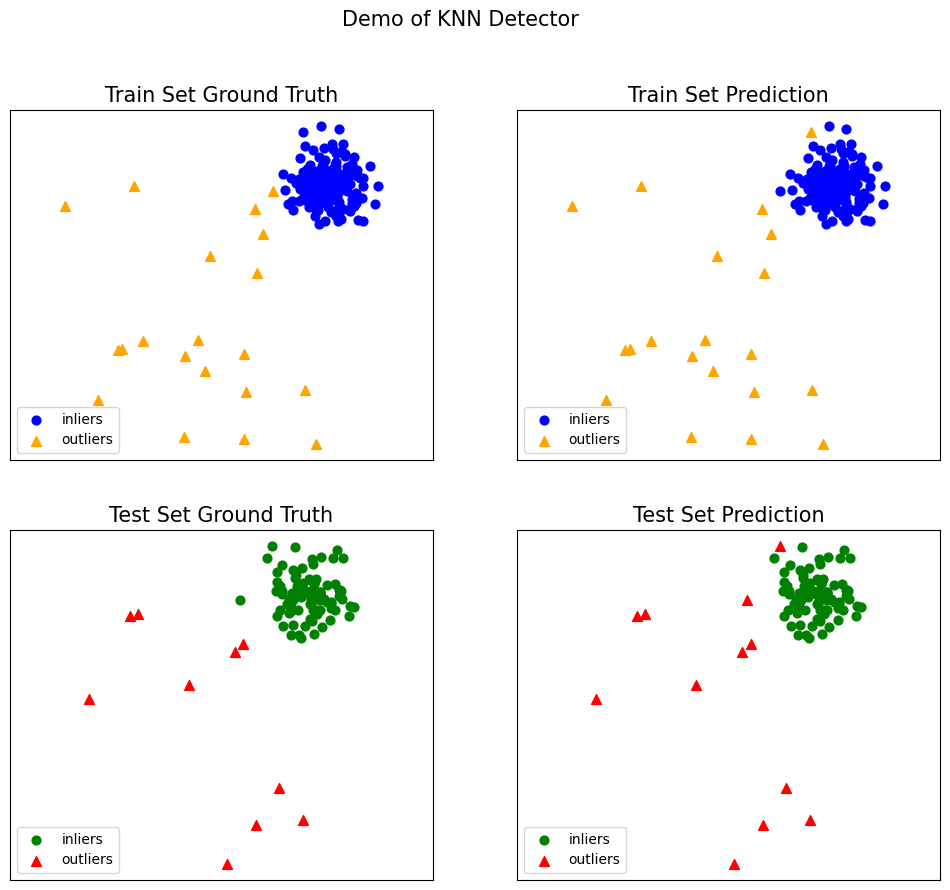

In [18]:
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred, y_test_pred, show_figure=True, save_figure=True)